# Predicting Industrial Machine Downtime: Level 3

In [10]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

df = pd.read_csv('data/machine_downtime.csv')
df.head()

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature,Spindle_Bearing_Temperature,Spindle_Vibration,Tool_Vibration,Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,31-12-2021,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,31-05-2022,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,31-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


In [11]:
df['Machine_ID'].value_counts()

Machine_ID
Makino-L1-Unit1-2013    874
Makino-L3-Unit1-2015    818
Makino-L2-Unit1-2015    808
Name: count, dtype: int64

In [12]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [13]:
df1 = df.copy()

In [14]:
df.dtypes

Date                           datetime64[ns]
Machine_ID                             object
Assembly_Line_No                       object
Hydraulic_Pressure(bar)               float64
Coolant_Pressure(bar)                 float64
Air_System_Pressure(bar)              float64
Coolant_Temperature                   float64
Hydraulic_Oil_Temperature             float64
Spindle_Bearing_Temperature           float64
Spindle_Vibration                     float64
Tool_Vibration                        float64
Spindle_Speed(RPM)                    float64
Voltage(volts)                        float64
Torque(Nm)                            float64
Cutting(kN)                           float64
Downtime                               object
dtype: object

In [15]:
df.shape

(2500, 16)

In [16]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,2500,2022-03-13 05:57:41.760000,2021-11-24 00:00:00,2022-02-22 00:00:00,2022-03-14 00:00:00,2022-04-02 00:00:00,2022-07-03 00:00:00,NaN
Hydraulic_Pressure(bar),2490.0,101.409084,-14.326454,76.355,96.763486,126.415727,191.0,30.289301
Coolant_Pressure(bar),2481.0,4.947058,0.325,4.462464,4.93996,5.518401,11.35,0.997357
Air_System_Pressure(bar),2483.0,6.499275,5.06348,6.217987,6.505191,6.78055,7.973992,0.407279
Coolant_Temperature,2488.0,18.559887,4.1,10.4,21.2,25.6,98.2,8.55448
Hydraulic_Oil_Temperature,2484.0,47.618317,35.2,45.1,47.7,50.1,61.4,3.768674
Spindle_Bearing_Temperature,2493.0,35.063698,22.6,32.5,35.1,37.6,49.5,3.764823
Spindle_Vibration,2489.0,1.009334,-0.461,0.777,1.008,1.236,2.0,0.342898
Tool_Vibration,2489.0,25.411975,2.161,21.089,25.455,29.79,45.726,6.437142
Spindle_Speed(RPM),2494.0,20274.792302,0.0,17919.0,20137.5,22501.75,27957.0,3852.660056


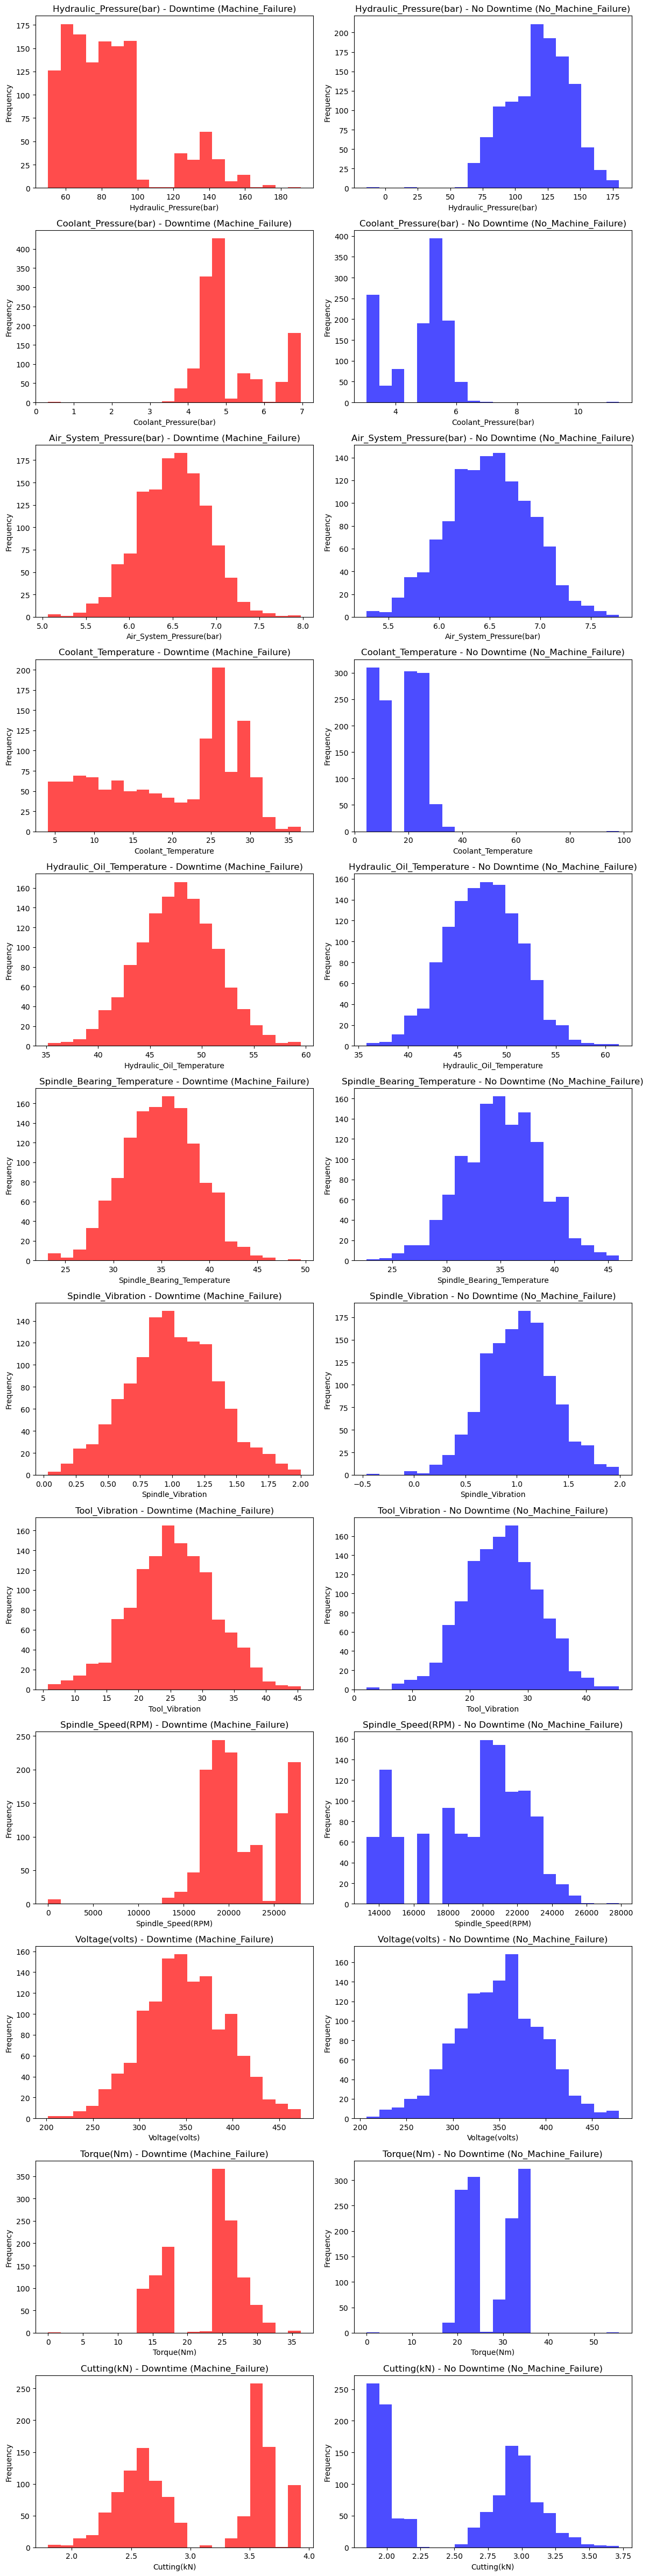

Histogram saved to numeric_features_histogram_downtime_vs_no_downtime.png


In [17]:
import matplotlib.pyplot as plt

# Filter the data based on Downtime status
downtime_data = df[df['Downtime'] == 'Machine_Failure']
no_downtime_data = df[df['Downtime'] == 'No_Machine_Failure']

# Select numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64', 'int32']).columns

# Create a figure with 2 subplots (side by side or one below the other)
fig, ax = plt.subplots(len(numeric_columns), 2, figsize=(12, len(numeric_columns) * 4))

# Loop through numeric columns and plot for both Downtime and No Downtime
for i, col in enumerate(numeric_columns):
    # Histogram for Downtime (Machine_Failure)
    ax[i, 0].hist(downtime_data[col], bins=20, color='red', alpha=0.7)
    ax[i, 0].set_title(f"{col} - Downtime (Machine_Failure)")
    ax[i, 0].set_xlabel(col)
    ax[i, 0].set_ylabel('Frequency')
    
    # Histogram for No Downtime (No_Machine_Failure)
    ax[i, 1].hist(no_downtime_data[col], bins=20, color='blue', alpha=0.7)
    ax[i, 1].set_title(f"{col} - No Downtime (No_Machine_Failure)")
    ax[i, 1].set_xlabel(col)
    ax[i, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Directory to save the output image
output_file = "numeric_features_histogram_downtime_vs_no_downtime.png"

# Save the figure
plt.savefig(output_file, dpi=300, bbox_inches='tight')  # High-resolution and tight layout
plt.show()  # Show the plot (optional)

print(f"Histogram saved to {output_file}")


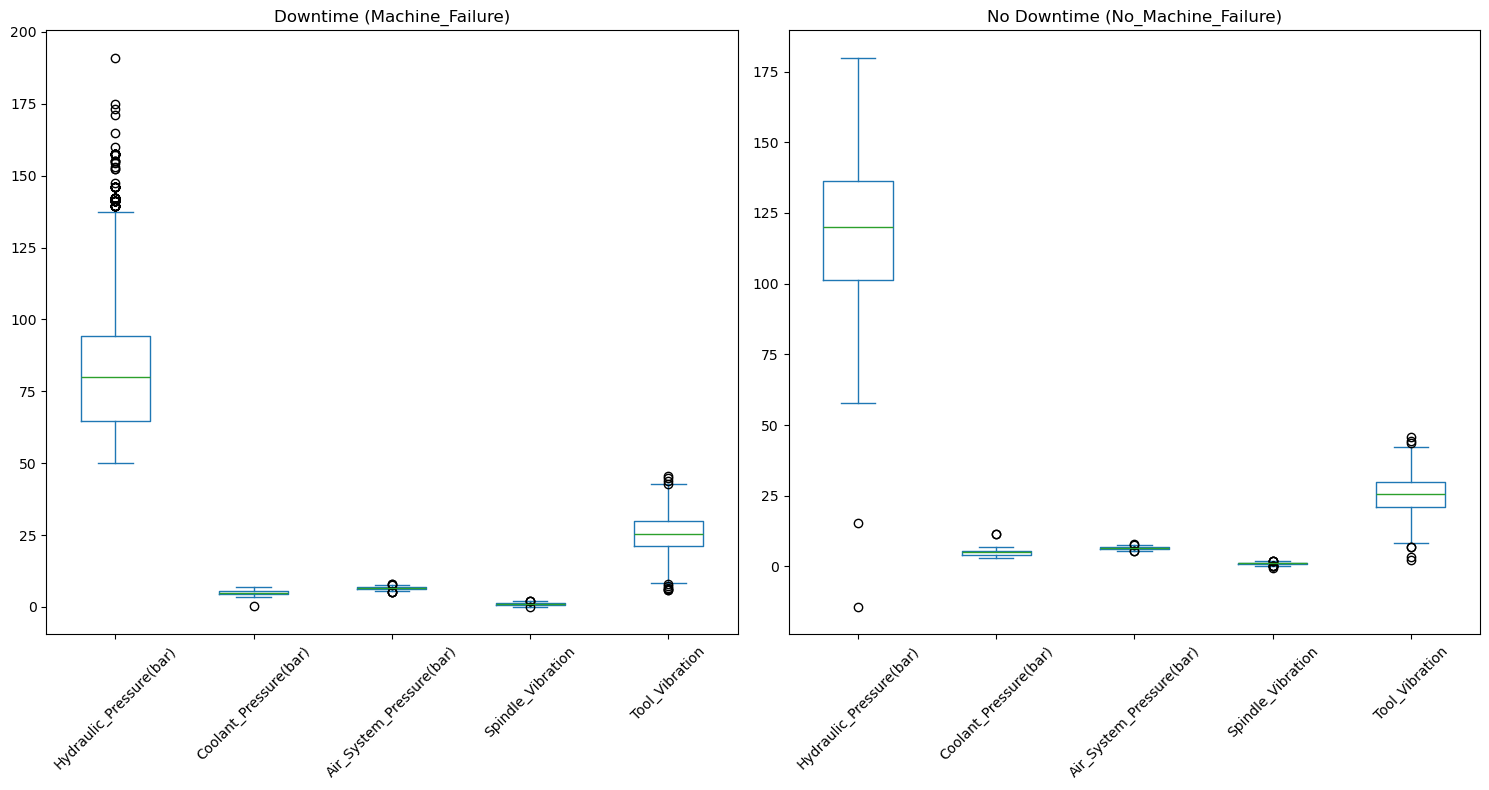

Boxplots saved to boxplots_numeric_columns_downtime.png


In [18]:
import matplotlib.pyplot as plt

# Filter the data based on Downtime status
downtime_data = df[df['Downtime'] == 'Machine_Failure']
no_downtime_data = df[df['Downtime'] == 'No_Machine_Failure']

# Create a figure with 2 subplots (side by side)
fig, ax = plt.subplots(1, 2, figsize=(15, 8))  # Two subplots: one for downtime, one for no downtime

# Boxplot for Downtime
downtime_data[['Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)', 
               'Spindle_Vibration', 'Tool_Vibration']].plot(kind='box', ax=ax[0])
ax[0].set_title("Downtime (Machine_Failure)")
ax[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Boxplot for No Downtime
no_downtime_data[['Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)', 
                  'Spindle_Vibration', 'Tool_Vibration']].plot(kind='box', ax=ax[1])
ax[1].set_title("No Downtime (No_Machine_Failure)")
ax[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Adjust layout
plt.tight_layout()

# Save the figure
output_file_boxplot = "boxplots_numeric_columns_downtime.png"
plt.savefig(output_file_boxplot, dpi=300, bbox_inches='tight')
plt.show()

print(f"Boxplots saved to {output_file_boxplot}")


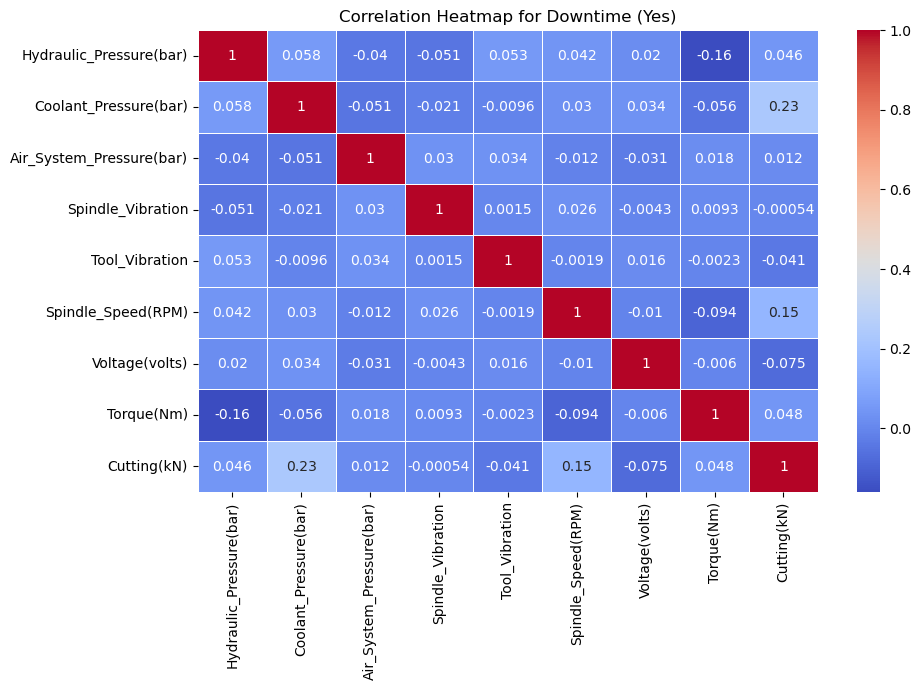

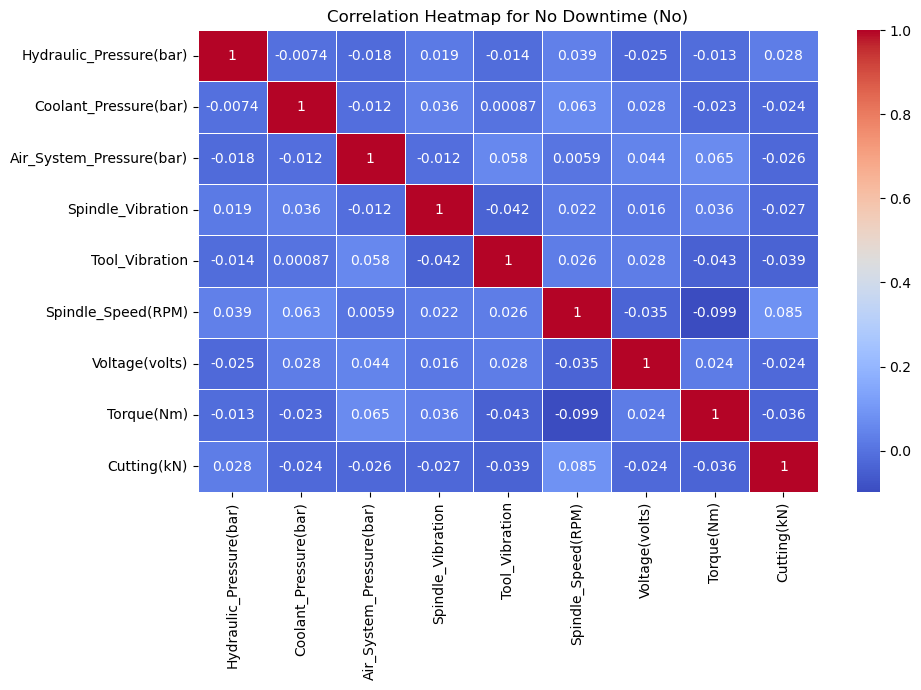

Heatmaps saved to correlation_heatmap_downtime.png


In [19]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Calculate correlation matrix separately for Downtime and No Downtime data
downtime_corr = downtime_data[['Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)', 
                               'Spindle_Vibration', 'Tool_Vibration', 'Spindle_Speed(RPM)', 'Voltage(volts)', 
                               'Torque(Nm)', 'Cutting(kN)']].corr()

no_downtime_corr = no_downtime_data[['Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)', 
                                     'Spindle_Vibration', 'Tool_Vibration', 'Spindle_Speed(RPM)', 'Voltage(volts)', 
                                     'Torque(Nm)', 'Cutting(kN)']].corr()

# Directory to save the output image
output_file_heatmap = "correlation_heatmap_downtime.png"

# Plot the correlation heatmap for Downtime
plt.figure(figsize=(10, 6))
sns.heatmap(downtime_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap for Downtime (Yes)")

# Save the figure
plt.savefig(output_file_heatmap, dpi=300, bbox_inches='tight')
plt.show()

# Plot the correlation heatmap for No Downtime
plt.figure(figsize=(10, 6))
sns.heatmap(no_downtime_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap for No Downtime (No)")

# Save the figure
plt.savefig(f"no_downtime_{output_file_heatmap}", dpi=300, bbox_inches='tight')
plt.show()

print(f"Heatmaps saved to {output_file_heatmap}")

In [20]:
# Descriptive statistics for categorical variables
machine_stats = df['Machine_ID'].describe()
assembly_line_stats = df['Assembly_Line_No'].describe()
machine_stats

count                     2500
unique                       3
top       Makino-L1-Unit1-2013
freq                       874
Name: Machine_ID, dtype: object

In [21]:
assembly_line_stats

count             2500
unique               3
top       Shopfloor-L1
freq               874
Name: Assembly_Line_No, dtype: object

In [22]:
# Set 'Date' as the index for time series analysis
df.set_index('Date', inplace=True)

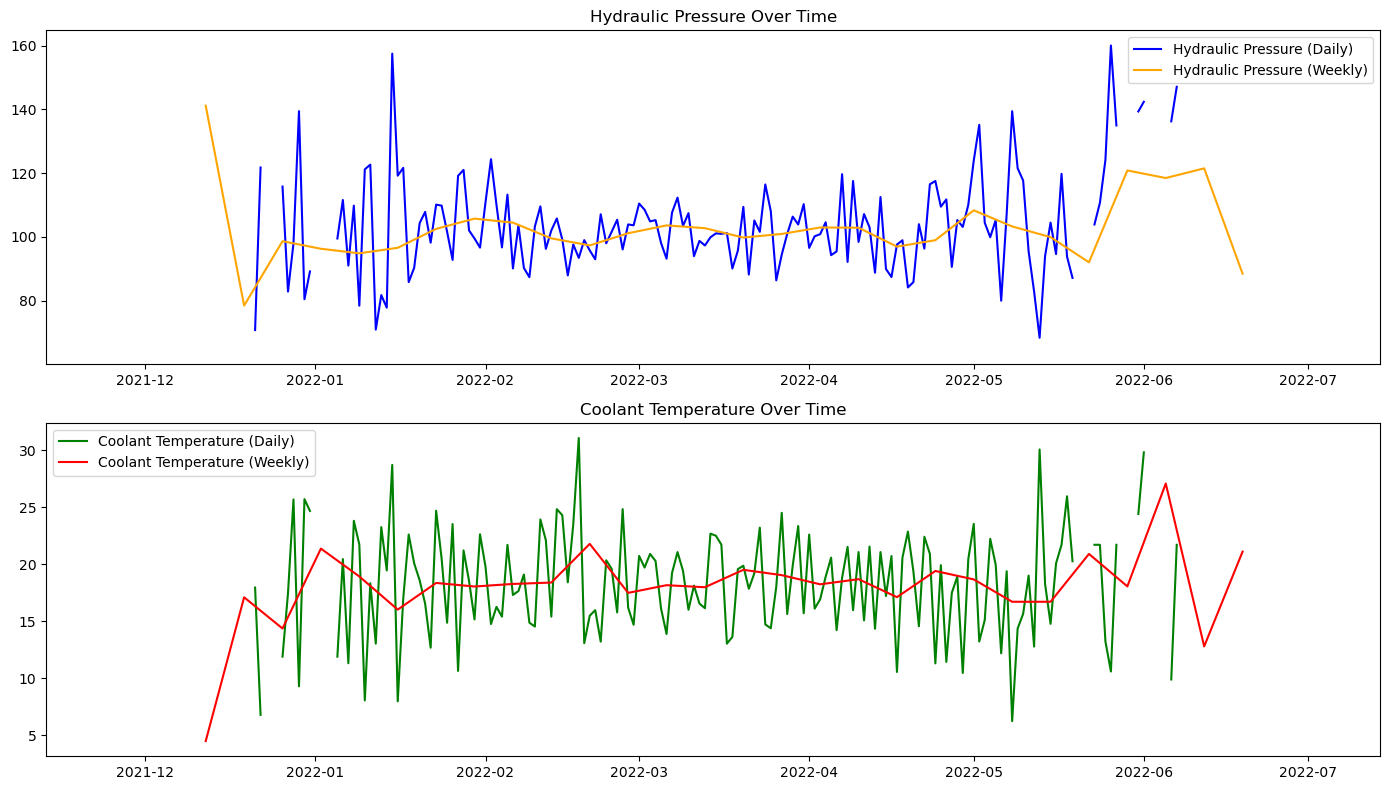

Trends saved to trends_hydraulic_pressure_coolant_temperature.png


In [23]:
import matplotlib.pyplot as plt

# Directory to save the output image
output_file = "trends_hydraulic_pressure_coolant_temperature.png"

# Select only numeric columns for resampling
numeric_df = df.select_dtypes(include='number')

# Resample data by day, week, and month
daily_data = numeric_df.resample('D').mean()
weekly_data = numeric_df.resample('W').mean()
monthly_data = numeric_df.resample('M').mean()

# Plot trends for key variables (Hydraulic Pressure, Coolant Temperature)
plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
plt.plot(daily_data.index, daily_data['Hydraulic_Pressure(bar)'], label='Hydraulic Pressure (Daily)', color='blue')
plt.plot(weekly_data.index, weekly_data['Hydraulic_Pressure(bar)'], label='Hydraulic Pressure (Weekly)', color='orange')
plt.title('Hydraulic Pressure Over Time')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(daily_data.index, daily_data['Coolant_Temperature'], label='Coolant Temperature (Daily)', color='green')
plt.plot(weekly_data.index, weekly_data['Coolant_Temperature'], label='Coolant Temperature (Weekly)', color='red')
plt.title('Coolant Temperature Over Time')
plt.legend()

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig(output_file, dpi=300, bbox_inches='tight')  # High resolution and tight layout
plt.show()  # Show the plot (optional)

print(f"Trends saved to {output_file}")


In [24]:
# Count of downtime occurrences
downtime_counts = df['Downtime'].value_counts()
print(downtime_counts)

Downtime
Machine_Failure       1265
No_Machine_Failure    1235
Name: count, dtype: int64


In [25]:
# Analyze the average metrics during downtime periods
downtime_data = df[df['Downtime'] == 'Machine_Failure']

# Summary statistics for downtime periods
downtime_summary = downtime_data.describe()
downtime_summary.T

,count,mean,std,min,25%,50%,75%,max
Hydraulic_Pressure(bar),1264.0,84.760498,26.341384,50.14000,64.802500,80.130000,94.290000,191.000000
Coolant_Pressure(bar),1265.0,5.114900,0.919927,0.32500,4.546032,4.791397,5.567857,6.960636
Air_System_Pressure(bar),1257.0,6.502980,0.399438,5.06348,6.225225,6.514118,6.775375,7.973992
Coolant_Temperature,1265.0,19.983083,8.378120,4.10000,12.300000,23.000000,26.500000,36.500000
Hydraulic_Oil_Temperature,1260.0,47.571349,3.791041,35.20000,45.100000,47.600000,50.100000,59.500000
Spindle_Bearing_Temperature,1263.0,34.991370,3.831686,23.20000,32.400000,35.000000,37.600000,49.500000
Spindle_Vibration,1261.0,1.003696,0.346738,0.03300,0.778000,0.996000,1.241000,2.000000
Tool_Vibration,1259.0,25.374516,6.504164,5.77500,21.058500,25.328000,29.747000,45.492000
Spindle_Speed(RPM),1265.0,21319.361265,4123.213322,0.00000,18461.000000,19964.000000,25528.000000,27957.000000
Voltage(volts),1265.0,349.258498,45.318043,202.00000,319.000000,348.000000,380.000000,473.000000


In [26]:
from scipy import stats

# Separate the data into downtime and no downtime
downtime_pressure = df[df['Downtime'] == 'Machine_Failure']['Hydraulic_Pressure(bar)']
no_downtime_pressure = df[df['Downtime'] == 'No_Machine_Failure']['Hydraulic_Pressure(bar)']

# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(downtime_pressure.dropna(), no_downtime_pressure.dropna())

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in Hydraulic Pressure during downtime.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in Hydraulic Pressure during downtime.")


T-statistic: -33.559122078353305
P-value: 5.31255500619395e-204
Reject the null hypothesis: There is a significant difference in Hydraulic Pressure during downtime.


In [27]:
df['Machine_ID'].value_counts()

Machine_ID
Makino-L1-Unit1-2013    874
Makino-L3-Unit1-2015    818
Makino-L2-Unit1-2015    808
Name: count, dtype: int64

# Feature Engineering

In [29]:
# Convert 'Machine_ID', 'Assembly_Line_No', and 'Downtime' to categorical codes
df1['Machine_ID'] = df1['Machine_ID'].astype('category').cat.codes
df1['Assembly_Line_No'] = df1['Assembly_Line_No'].astype('category').cat.codes
df1['Downtime'] = df1['Downtime'].map({'Machine_Failure': 1, 'No_Machine_Failure': 0})

In [30]:
df1['Machine_ID'].value_counts()

Machine_ID
0    874
2    818
1    808
Name: count, dtype: int64

In [31]:
df1['Pressure_Diff'] = df1['Hydraulic_Pressure(bar)'] - df1['Coolant_Pressure(bar)']
df1['Temp_Diff'] = df1['Coolant_Temperature'] - df1['Spindle_Bearing_Temperature']
df1['Torque_Speed'] = df1['Torque(Nm)'] * df1['Spindle_Speed(RPM)']
df1['Rolling_Mean_Temperature'] = df1['Coolant_Temperature'].rolling(window=5).mean()
df1['Rolling_Mean_Vibration'] = df1['Spindle_Vibration'].rolling(window=5).mean()
df1['Lag_1_Temperature'] = df1['Coolant_Temperature'].shift(1)
df1['Lag_1_Vibration'] = df1['Spindle_Vibration'].shift(1)
df1['Pressure_Change'] = df1['Hydraulic_Pressure(bar)'].diff()
df1['Temperature_Change'] = df1['Coolant_Temperature'].diff()
df1['Overheat_Flag'] = (df1['Coolant_Temperature'] > 75).astype(int)
df1['Vibration_Flag'] = (df1['Spindle_Vibration'] > 0.5).astype(int)
df1['Pressure_Temp_Interaction'] = df1['Hydraulic_Pressure(bar)'] * df1['Coolant_Temperature']
df1['Vibration_Speed_Interaction'] = df1['Spindle_Vibration'] * df1['Spindle_Speed(RPM)']
df1['Cumulative_Pressure'] = df1['Hydraulic_Pressure(bar)'].cumsum()
df1['Cumulative_Vibration'] = df1['Spindle_Vibration'].cumsum()
df1['Days_of_Operation'] = (df1['Date'] - df1.groupby('Machine_ID')['Date'].transform('min')).dt.days
df1['Operational_Intensity'] = df1['Spindle_Speed(RPM)'] * df1['Torque(Nm)'] * df1['Cutting(kN)']
df1['Temperature_Bin'] = pd.cut(df1['Coolant_Temperature'], bins=[0, 50, 75, 100], labels=['Low', 'Medium', 'High']).cat.codes
df1['Pressure_Bin'] = pd.cut(df1['Hydraulic_Pressure(bar)'], bins=[0, 100, 150, 200], labels=['Low', 'Medium', 'High']).cat.codes
df1['Maintenance_Due'] = (df1['Days_of_Operation'] > 60).astype(int)


In [32]:
# Drop unnecessary columns
df1.drop(['Date'], axis=1, inplace=True)

# Building the Global Model to Predict Downtime

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [35]:
X = df1.drop('Downtime', axis=1).fillna(0)
y = df1['Downtime']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Top 6 features used by Random Forest:
['Torque(Nm)', 'Cutting(kN)', 'Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)', 'Pressure_Diff', 'Pressure_Bin']

Random Forest Results:
F1 Score: 0.992
Accuracy: 0.992
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       247
           1       0.99      0.99      0.99       253

    accuracy                           0.99       500
   macro avg       0.99      0.99      0.99       500
weighted avg       0.99      0.99      0.99       500



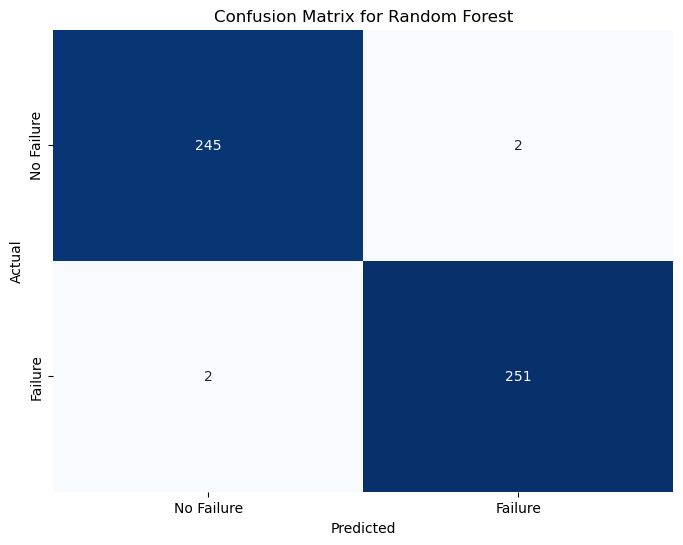

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Initialize RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
rf_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)

# Select top 6 features
top_6_rf_features = rf_importances.nlargest(6).index

# Print the top 6 features
print("Top 6 features used by Random Forest:")
print(list(top_6_rf_features))

# Train model again using only top 6 features
X_train_rf = X_train[top_6_rf_features]
X_test_rf = X_test[top_6_rf_features]

rf_model.fit(X_train_rf, y_train)
y_pred_rf = rf_model.predict(X_test_rf)

# Evaluate Random Forest model
print("\nRandom Forest Results:")
print("F1 Score:", f1_score(y_test, y_pred_rf, average='weighted'))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot Confusion Matrix with Color
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'], cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()


Top 6 features used by Gradient Boosting:
['Hydraulic_Pressure(bar)', 'Torque(Nm)', 'Cutting(kN)', 'Coolant_Pressure(bar)', 'Spindle_Speed(RPM)', 'Pressure_Diff']
Gradient Boosting Results:
F1 Score: 0.9899997199451092
Accuracy: 0.99
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       247
           1       0.99      0.99      0.99       253

    accuracy                           0.99       500
   macro avg       0.99      0.99      0.99       500
weighted avg       0.99      0.99      0.99       500



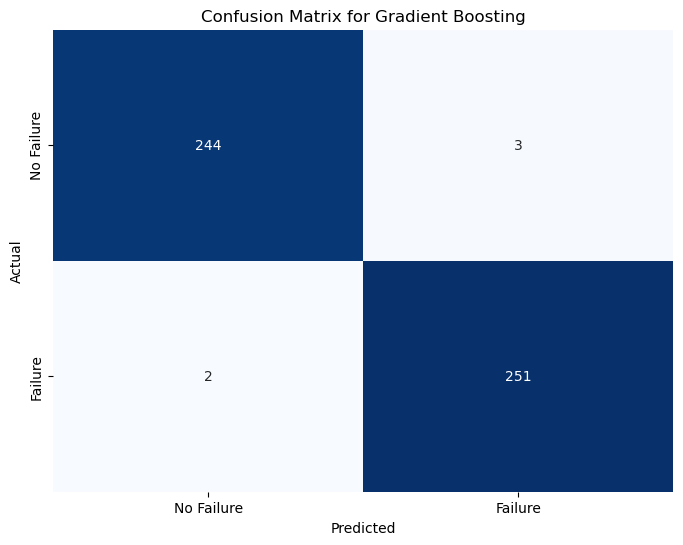

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Initialize GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Get feature importances
gb_importances = pd.Series(gb_model.feature_importances_, index=X_train.columns)

# Select top 6 features
top_6_gb_features = gb_importances.nlargest(6).index

# Print the top 6 features
print("Top 6 features used by Gradient Boosting:")
print(list(top_6_gb_features))

# Train model again using only top 6 features
X_train_gb = X_train[top_6_gb_features]
X_test_gb = X_test[top_6_gb_features]

gb_model.fit(X_train_gb, y_train)
y_pred_gb = gb_model.predict(X_test_gb)

# Evaluate Gradient Boosting model
print("Gradient Boosting Results:")
print("F1 Score:", f1_score(y_test, y_pred_gb, average='weighted'))
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_gb)

# Plot Confusion Matrix with Color
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'], cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Gradient Boosting')
plt.show()


Top 6 features used by Logistic Regression:
['Pressure_Temp_Interaction', 'Spindle_Speed(RPM)', 'Hydraulic_Pressure(bar)', 'Pressure_Diff', 'Pressure_Change', 'Torque_Speed']

Logistic Regression Results:
F1 Score: 0.808
Accuracy: 0.808
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       247
           1       0.81      0.81      0.81       253

    accuracy                           0.81       500
   macro avg       0.81      0.81      0.81       500
weighted avg       0.81      0.81      0.81       500



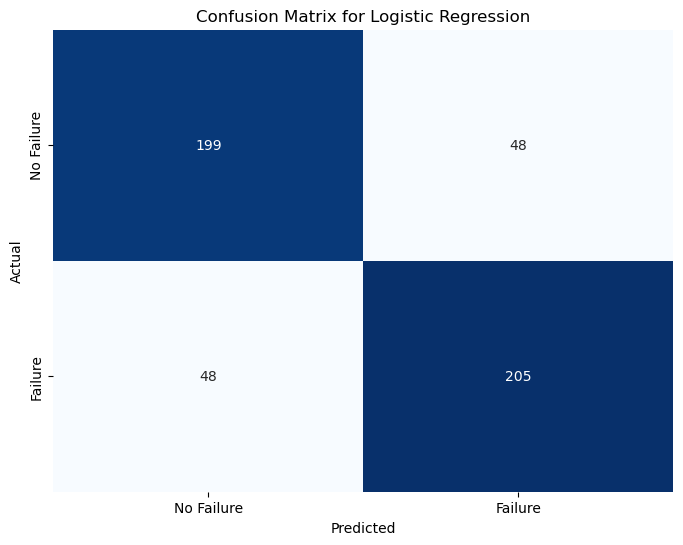

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Initialize LogisticRegression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Get feature importances using the coefficients
lr_importances = pd.Series(abs(lr_model.coef_[0]), index=X_train.columns)

# Select top 6 features
top_6_lr_features = lr_importances.nlargest(6).index

# Print the top 6 features
print("Top 6 features used by Logistic Regression:")
print(list(top_6_lr_features))

# Train model again using only top 6 features
X_train_lr = X_train[top_6_lr_features]
X_test_lr = X_test[top_6_lr_features]

lr_model.fit(X_train_lr, y_train)
y_pred_lr = lr_model.predict(X_test_lr)

# Evaluate Logistic Regression model
print("\nLogistic Regression Results:")
print("F1 Score:", f1_score(y_test, y_pred_lr, average='weighted'))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)

# Plot Confusion Matrix with Color
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'], cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix
import pandas as pd

X = df1[['Pressure_Temp_Interaction', 'Spindle_Speed(RPM)', 'Hydraulic_Pressure(bar)', 'Pressure_Diff', 'Pressure_Change', 'Torque_Speed','Machine_ID']]
y = df1['Downtime']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create a function to train and evaluate the model
def train_evaluate_model(X_train, X_test, y_train, y_test, machine_id=None):
    # Initialize RandomForestClassifier
    rf_model = RandomForestClassifier(random_state=42)
    
    # Train the model
    rf_model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = rf_model.predict(X_test)
    
    # Evaluate the model
    print(f"Results for Machine: {machine_id}" if machine_id else "Overall Model Results")
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n" + "="*50 + "\n")

    return accuracy_score(y_test, y_pred)

# Feature columns (excluding 'Downtime' and 'Machine_ID')
feature_columns = df1.drop(['Downtime', 'Machine_ID'], axis=1).columns

# Overall model without separating machines
X = df1[feature_columns]
y = df1['Downtime']

# Train-test split (Overall Model)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train and evaluate the overall model
overall_accuracy = train_evaluate_model(X_train, X_test, y_train, y_test)

# Now, model each machine separately
machine_accuracies = {}

for machine in df1['Machine_ID'].unique():
    print(f"Modeling for Machine: {machine}")
    
    # Filter the data for the current machine
    machine_data = df1[df1['Machine_ID'] == machine]
    
    # Features and target for the current machine
    X_machine = machine_data[feature_columns]
    y_machine = machine_data['Downtime']
    
    # Train-test split for the current machine
    X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_machine, y_machine, test_size=0.2, random_state=42, stratify=y_machine)
    
    # Train and evaluate the model for the current machine
    machine_accuracy = train_evaluate_model(X_train_m, X_test_m, y_train_m, y_test_m, machine_id=machine)
    
    # Store the accuracy for comparison
    machine_accuracies[machine] = machine_accuracy

# Print comparison
print("\nOverall Model Accuracy:", overall_accuracy)
print("\nMachine-specific Model Accuracies:")
for machine, accuracy in machine_accuracies.items():
    print(f"{machine}: {accuracy}")
    
# Comparison Summary
print("\n" + "="*50)
if max(machine_accuracies.values()) > overall_accuracy:
    print("Machine-specific models perform better than the overall model.")
else:
    print("The overall model performs as well or better than the machine-specific models.")


Overall Model Results
F1 Score: 0.988
Accuracy: 0.988
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       247
           1       0.99      0.99      0.99       253

    accuracy                           0.99       500
   macro avg       0.99      0.99      0.99       500
weighted avg       0.99      0.99      0.99       500

Confusion Matrix:
 [[244   3]
 [  3 250]]


Modeling for Machine: 0
Overall Model Results
F1 Score: 0.9600156816622563
Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        84
           1       0.98      0.95      0.96        91

    accuracy                           0.96       175
   macro avg       0.96      0.96      0.96       175
weighted avg       0.96      0.96      0.96       175

Confusion Matrix:
 [[82  2]
 [ 5 86]]


Modeling for Machine: 2
Results for Machine: 2
F1 Score: 0.97560975609